<a href="https://colab.research.google.com/github/raisulislam0/Practice/blob/master/smart_agriculture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

In [3]:
data = pd.read_csv("Crop_recommendation.csv")
data1=pd.read_csv("Crop_recommendation.csv")

In [18]:
from sklearn.cluster import KMeans

# removing the labels column
x = data.drop(['label'], axis=1)

# selecting all the values of the data
x = x.values

# checking the shape
print(x.shape)

(2200, 7)


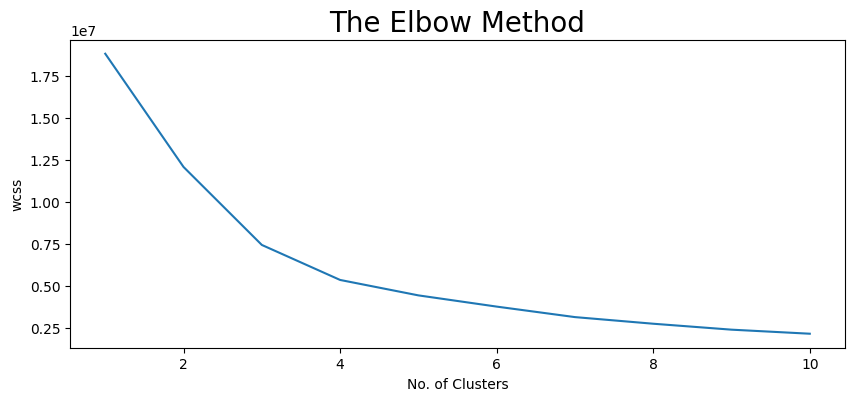

In [19]:
# Lets determine the Optimum Number of Clusters within the Dataset

plt.rcParams['figure.figsize'] = (10, 4)

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

# Lets plot the results
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [20]:
# Lets implement the K Means algorithm to perform Clustering analysis
km =KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)
# Lets find out the Results
a = data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

# Lets check the Clusters of each Crops
print("Lets check the Results After Applying the K Means Clustering Analysis \n")
print("Crops in First cluster:", z[z['cluster'] == 0][ 'label'].unique())
print("----------------------------------------------------------------")
print("Crops in Second cluster:", z[z['cluster'] == 1][ 'label'].unique())
print("----------------------------------------------------------------")
print("Crops in Third cluster:", z[z['cluster'] == 2][ 'label'].unique())
print("----------------------------------------------------------------")
print("Crops in Forth cluster:", z[z['cluster'] == 3][ 'label'].unique())

Lets check the Results After Applying the K Means Clustering Analysis 

Crops in First cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
----------------------------------------------------------------
Crops in Second cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
----------------------------------------------------------------
Crops in Third cluster: ['grapes' 'apple']
----------------------------------------------------------------
Crops in Forth cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [21]:
y = data['label']
x = data.drop(['label'], axis = 1)

print("Shape of x:", x.shape)
print("shape of y:", y.shape)

Shape of x: (2200, 7)
shape of y: (2200,)


In [22]:
y.sample(10)

836         lentil
454     pigeonpeas
1125         mango
1066        banana
1784        papaya
1542         apple
2011          jute
1676        orange
1182         mango
1748        papaya
Name: label, dtype: object

In [23]:
# Lets create Training and Testing Sets for Validation of Results
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("The Shape of x train:", x_train.shape)
print("The Shape of x test:", x_test.shape)
print("The Shape of y train:", y_train.shape)
print("The Shape of y test:", x_test.shape)

The Shape of x train: (1760, 7)
The Shape of x test: (440, 7)
The Shape of y train: (1760,)
The Shape of y test: (440, 7)


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LogisticRegression(max_iter=1000)
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)



NameError: name 'LogisticRegression' is not defined

In [26]:
# Lets evaluate the Model Performance
from sklearn.metrics import confusion_matrix

# Lets print the Confusion matrix first
plt.rcParams['figure.figsize'] = (10, 10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Wistia')
plt.title('Confusion Matrix for Logistic Regression', fontsize=15)
plt.show()

NameError: name 'y_pred' is not defined

In [38]:
# Lets print the Classification Repost also
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.87      0.91      0.89        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        16
      grapes       1.00      1.00      1.00        18
        jute       0.87      0.95      0.91        21
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.82      0.82      0.82        17
       maize       1.00      0.94      0.97        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.95      0.84      0.89        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       0.96      1.00      0.98        23
      orange       1.00      1.00      1.00        23
      papaya       0.95    

In [44]:
data.sample(20)

,N,P,K,temperature,humidity,ph,rainfall,label
655,25,40,21,27.733291,81.139030,6.248901,44.175809,mungbean
65,99,41,36,24.458021,82.748356,6.738652,182.561632,rice
229,43,68,81,17.478094,17.932540,6.761600,78.920602,chickpea
301,25,70,16,19.634743,18.907056,5.759237,106.359818,kidneybeans
2078,71,56,37,23.188667,86.208997,6.491506,176.103677,jute
649,1,48,24,29.345946,85.604726,6.232837,59.036300,mungbean
84,67,58,39,25.282722,80.543728,5.453592,220.115671,rice
32,85,37,39,24.527837,82.736856,6.364135,224.675723,rice
461,20,77,23,34.872487,38.837860,5.180272,148.250279,pigeonpeas
265,29,75,75,19.624163,18.714832,7.064790,88.458569,chickpea


In [47]:
prediction = model.predict((np.array([[61,
                                      68,
                                      51,
                                      37,
                                      92,
                                      6.8,
                                     240]])))
print("The Suggested Crop for Given Climatic Condition is :", prediction)

The Suggested Crop for Given Climatic Condition is : ['rice']


In [27]:
features = data[['N','P','K','temperature','humidity','ph','rainfall']]

In [28]:
target = data['label']
labels = data['label']

In [29]:
acc=[]
model = []

In [30]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(features,target,random_state=42,test_size=0.3)

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
dt = DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=5)
dt.fit(xtrain,ytrain)
predicted_values = dt.predict(xtest)
x = metrics.accuracy_score(ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(ytest,predicted_values))

DecisionTrees's Accuracy is:  86.81818181818181
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       0.57      1.00      0.72        26
    chickpea       1.00      0.97      0.99        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        23
        jute       0.71      0.94      0.81        34
 kidneybeans       0.00      0.00      0.00        36
      lentil       0.50      1.00      0.67        22
       maize       1.00      1.00      1.00        26
       mango       1.00      1.00      1.00        32
   mothbeans       0.00      0.00      0.00        34
    mungbean       0.97      1.00      0.98        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dt, features, target,cv=5)
score

array([0.93636364, 0.91136364, 0.92045455, 0.87272727, 0.93636364])

In [33]:
import pickle as pk
pk.dump(dt,open('Deceision Tree','wb'))

In [34]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(xtrain,ytrain)

predicted_values = gnb.predict(xtest)
x = metrics.accuracy_score(ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9939393939393939
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        23
        jute       0.89      1.00      0.94        34
 kidneybeans       1.00      1.00      1.00        36
      lentil       1.00      1.00      1.00        22
       maize       1.00      1.00      1.00        26
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      1.00      1.00        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00 

In [35]:
score = cross_val_score(gnb,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

In [36]:
pk.dump(gnb,open('Guassian Naive Bayes','wb'))

In [37]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(xtrain)
x_train_norm = norm.transform(xtrain)
# transform testing dataabs
x_test_norm = norm.transform(xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(x_train_norm,ytrain)
predicted_values = SVM.predict(x_test_norm)
x = metrics.accuracy_score(ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(ytest,predicted_values))

SVM's Accuracy is:  0.9681818181818181
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       0.93      1.00      0.96        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      0.93      0.97        30
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        23
        jute       0.73      0.97      0.84        34
 kidneybeans       0.97      1.00      0.99        36
      lentil       0.91      0.95      0.93        22
       maize       1.00      0.96      0.98        26
       mango       0.97      1.00      0.98        32
   mothbeans       0.97      0.94      0.96        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00      1.0

In [38]:
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.97954545, 0.975     , 0.98863636, 0.98863636, 0.98181818])

In [39]:
pk.dump(SVM,open('SVM','wb'))

In [40]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(xtrain,ytrain)

predicted_values = LogReg.predict(xtest)

x = metrics.accuracy_score(ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(ytest,predicted_values))

Logistic Regression's Accuracy is:  0.946969696969697
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       0.96      1.00      0.98        26
   blackgram       0.76      0.85      0.80        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       0.97      1.00      0.98        30
      cotton       0.87      0.96      0.92        28
      grapes       1.00      1.00      1.00        23
        jute       0.81      0.88      0.85        34
 kidneybeans       1.00      0.97      0.99        36
      lentil       0.91      0.91      0.91        22
       maize       0.95      0.77      0.85        26
       mango       0.97      1.00      0.98        32
   mothbeans       0.90      0.82      0.86        34
    mungbean       0.94      1.00      0.97        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
pk.dump(LogReg,open('LogisticRegression','wb'))

In [42]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(xtrain,ytrain)

predicted_values = RF.predict(xtest)

x = metrics.accuracy_score(ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

RF's Accuracy is:  0.9924242424242424


<ipython-input-43-715e3729f7cc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = acc,y = model,palette='dark')


<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

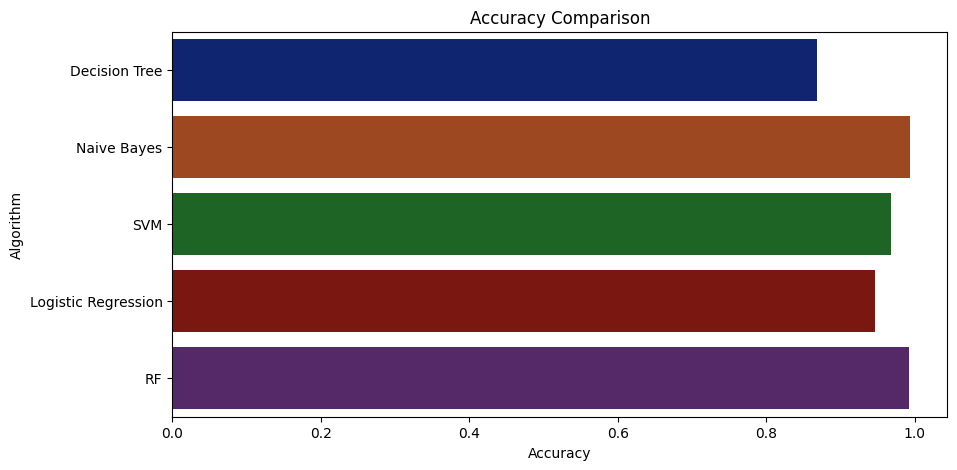

In [43]:
plt.figure(figsize=[10,5])
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [44]:
accuracy_models = dict(zip(model, acc))

max=0

for k, v in accuracy_models.items():
  if v > max:
    max = v
    a = k
print(a,'->', max)




Naive Bayes -> 0.9939393939393939


In [45]:
data1.sample(10)

,N,P,K,temperature,humidity,ph,rainfall,label
1707,34,65,47,23.485470,93.710437,6.833769,191.776056,papaya
990,9,16,36,23.779890,92.933869,5.893332,106.977723,pomegranate
1933,113,37,20,25.033002,79.043687,7.393441,97.100870,cotton
269,34,76,80,20.656918,15.845726,7.985417,65.238111,chickpea
1862,17,30,27,29.030650,90.790939,5.894027,205.572037,coconut
1683,24,30,11,32.395240,94.517685,6.601396,113.253730,orange
1187,22,38,31,31.533564,53.060093,5.821106,98.570250,mango
1523,34,140,198,21.704170,93.440063,5.751707,115.178140,apple
404,10,79,18,21.064368,55.469859,5.624731,184.622671,pigeonpeas
2161,87,28,35,26.560278,57.162181,6.759212,152.061623,coffee


In [46]:
data = np.array([[17,16, 14, 16, 92, 6.8, 103]])
prediction = gnb.predict(data)
print(prediction)

['orange']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [48]:
def crop_recom(N,P,K,tem,hum,ph,rain):
    crop = RF.predict([[N,P,K,tem,hum,ph,rain]])
    return crop

In [51]:
crop_recom(83, 45, 60, 28, 70.3, 7.0, 150.9)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['jute'], dtype=object)

In [50]:
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense

In [67]:
X = data1.drop("label", axis=1)
y = data1["label"]

# Encode the target variable
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the ANN model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", accuracy)

Epoch 1/100
44/44 [==============================] - 2s 12ms/step - loss: 2.6899 - accuracy: 0.2791 - val_loss: 2.1424 - val_accuracy: 0.5540
Epoch 2/100
44/44 [==============================] - 0s 8ms/step - loss: 1.4820 - accuracy: 0.7109 - val_loss: 0.9075 - val_accuracy: 0.7585
Epoch 3/100
44/44 [==============================] - 0s 9ms/step - loss: 0.5785 - accuracy: 0.8750 - val_loss: 0.4119 - val_accuracy: 0.8977
Epoch 4/100
44/44 [==============================] - 0s 8ms/step - loss: 0.2861 - accuracy: 0.9361 - val_loss: 0.2781 - val_accuracy: 0.9006
Epoch 5/100
44/44 [==============================] - 0s 6ms/step - loss: 0.1987 - accuracy: 0.9531 - val_loss: 0.2121 - val_accuracy: 0.9205
Epoch 6/100
44/44 [==============================] - 0s 5ms/step - loss: 0.1498 - accuracy: 0.9588 - val_loss: 0.1621 - val_accuracy: 0.9403
Epoch 7/100
44/44 [==============================] - 0s 6ms/step - loss: 0.1158 - accuracy: 0.9702 - val_loss: 0.1459 - val_accuracy: 0.9432
Epoch 8/100


In [68]:
def crop_recom2(N,P,K,tem,hum,ph,rain):
    crop = model.predict([[N,P,K,tem,hum,ph,rain]])
    return crop

In [69]:
crop_recom(83, 45, 60, 28, 70.3, 7.0, 150.9)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['jute'], dtype=object)